# Kmeans

In [1]:
from google.colab import drive
drive.mount('/content/drive')

basicpath = '/content/drive/MyDrive/Univ/4-1/Data Science/Practice/12주차/'

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import pairwise_distances

## Data import 및 확인

In [3]:
file = 'input_quiz.csv'

data = pd.read_csv(os.path.join(basicpath, file), index_col=None)

In [4]:
data.head(10)

,x,y
0,69.937766,31.570952
1,20.356235,45.934504
2,72.468891,33.579962
3,70.737504,29.462956
4,53.236145,8.314857
5,49.983086,6.977777
6,40.685368,36.066633
7,20.298744,34.252849
8,51.668822,8.197806
9,18.270403,23.540949


## Data scatter plot으로 확인

In [5]:
x = data['x']
y = data['y']

In [6]:
import matplotlib.pyplot as plt

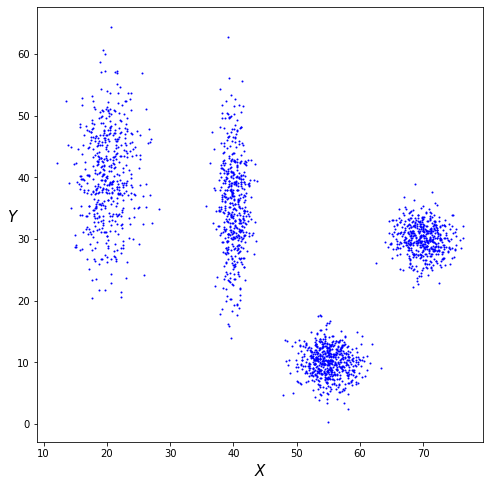

In [7]:
plt.figure(figsize=[8, 8])
plt.scatter(x, y, s=1, c='b')
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15, rotation=0)
plt.show()

## 과제1. Kmeans 알고리즘 구현
다음 코드의 빈칸을 완성하여 Kmeans 알고리즘을 완성하시오.

In [26]:
def distance(a, b):
    """ 두 array x, y간의 row 끼리에 대한 L2 distance를 계산하여 
    계산한 distance들을 array로 저장하여 반환.
    x와 y간 broadcasting이 가능한 경우 broadcasting하여 계산
    
    Parameters
    ----------
    x: np.array
        각 row에 하나의 data point가 저장
    y: np.array
        각 row에 하나의 data point가 저장
    
    Returns
    ----------
    np.array
        x와 y가 각각 (m, n) 형태의 array일때, 
        x와 y의 row들에 대한 L2 distance를 저장하여
        (m, 1)의 형태로 저장하여 반환
        
        x혹은 y중 하나가 (1, n)형태일 경우 
        broadcasting하여 (m, 1)형태로 반환
    """

    #답변 1
    # distances = np.sum((a - b) ** 2, axis=1) ** 0.5
    distances = pairwise_distances(a, b)
    return distances

#### 출력 예시

a = np.array([1,2])  
b = np.array([[1,2], [1,3], [4,6]])  
distance(a, b)   
\>> array([0., 1., 5.])

In [30]:
a = np.array([1,2])
b = np.array([[1,2], [1,3], [4,6]])
distance(a, b)

ValueError: ignored

In [27]:
def _assign_labels(X, centers):
    """ X의 각 data point를 각각의 cluster에 assign
    각각의 cluster center와 거리를 측정하여 가까운 cluster에 assign
    
    Parameters
    ----------
    X: np.array
        my_kmeans함수의 input data의 data값 (data.values)
    
    centers:
        np.array
        각각의 cluster center좌표롤 array로 표현
        cluster의 개수가 k이고, 좌표를 d차원으로 표기할때
        (k, d)의 shape을 가짐

    Return
    ----------
    np.array
        input X가 m개의 data point를 가질 때, 
        (m,)의 shape을 가지는 1d array
        X의 특정 data point의 index를 d_index라 할 때, 
        return array[d_index]에는 assign된 cluster number를 저장
        cluster number는 range(0, k, step=1)로 표현
    """
    #답변 2
    #위 distance 함수를 적절히 활용
    #np.argmin() // 가장 작은 값의 index값을 출력

    # labels = np.zeros(X.shape[0])

    # for i, p in enumerate(X):
    #   dists_from_center = distance(p, centers)
    #   labels[i] = np.argmin(dists_from_center)
  
    labels = np.argmin(distance(X, centers), axis=1)
    # 각 row는 모든 center와의 거리 배열을 가지고 있을건데, 거기서 가장 작은걸 고른다.
    # argmin은 minimum한 값의 index
    # min은 mimimum값 그 자체

    return labels

#### 출력 예시
X = np.array([[1,1], [2,3], [3,4], [4,4]])  
centers = np.array([[2,3], [3,4]])   
_assign_labels(X, centers)  
\>> array([0., 0., 1., 1.])

In [28]:
X = np.array([[1,1], [2,3], [3,4], [4,4]])
centers = np.array([[2,3], [3,4]])
_assign_labels(X, centers)

array([0, 0, 1, 1])

In [29]:
def _update_centers(X, labels, k):
    """ Cluster center를 update
    K-means algorithm에 따라, 한 cluster에 assign된 data points에 대해
    그 mean point로 center를 이동
    
    Parameters
    ----------
    X: np.array
        my_kmeans함수의 input data의 data값 (data.values)
        
    labels: np.array
        _assign_labels의 return값으로
        X의 datapoints를 cluter에 assign한 결과 array
        
    k: integer
        K means의 cluster 개수인 k값을 지정

    Return
    ----------
    np.array
      각 row가 새로운 center값을 가지는 (k, 2) array
    """
    #답변 3
    new_centers = np.zeros([k, 2])
    for i in range(k):
      mask = (labels == i)
      new_centers[i] = np.mean(X[mask], axis = 0)

    return new_centers

In [ ]:
def my_kmeans(data, k):
    """ 메인 K means 알고리즘
    data의 points중 k개의 임의의 point를 select하여 cluster center로 삼음
    while:
        data의 각 points에서 각각의 cluster에 대한 거리를 계산하여 가까운 cluster에 assign
        형성된 cluster의 mean point를 계산하여 새로운 cluster center로 만듦
        소속된 cluster가 바뀌는 data가 없으면 break
    
    Parameters
    ----------
    data: pd.DataFrame
        row: data point
        column: x좌표, y좌표
        
    k: integer
        K means의 cluster 개수인 k값을 지정
        
    Return
    ----------
    np.array
        1 dimension array로 각 data point가 어떤 cluster에 속하는지 표현
        Input data의 특정 data point에 대한 index를 d_index라 할 때, 
        return_array[d_index]는 해당 data point의 cluster number를 의미
        cluster number는 range(0, k, step=1)로 표현
    """
  
    
    #답변 4
    
    # 초기화 - np.random.choice를 활용한 center 초기화

    X = data.values # pandas에서 data를 numpy array로 가져와
    # Random으로 선택한 data points
    # X.shape[0] row의 개수, 전체 데이터의 개수
    arr_idx = np.arange(X.shape[0])
    # replace = False 비복원 추출하겠다
    init_center_idx = np.random.choice(arr_idx, k, replace=False)
    centers = X[init_center_idx]

    # 각 cluster에 data points assign
    # 가장 가까운 center에 각 data point를 할당
    # 각 center에 data points assign하여 cluster 형성
    # 그냥 for문돌아서 다 할수도 있는데
    # all pair wise distance를 구할건데, 우리가 pair wise distance를 쉽게 구하는 방법이 있어
    # 선형대수? root(XdotX - 2 XY + YdotY)
    # scikit learn에서 그걸 구현해뒀어
    labels = _assign_labels(X, centers)

    old_labels = None
    # K-means algorithm - center update, data assign 반복
    while np.any(old_labels != labels):
      old_labels = labels
      new_centers = _update_centers(X, labels, k)
      labels = _assign_labels(X, new_centers)
        
    return labels

In [ ]:
labels = my_kmeans(data, 4)
labels

## Clustering 결과 확인

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.gist_rainbow(each) 
        for each in np.linspace(0, 1, len(unique_labels))]

In [ ]:
plt.figure(figsize=[8, 8])
for cluster_index, col in zip(unique_labels, colors):
    if cluster_index == -1:
        col = [0, 0, 0, 1]
    class_mask = (labels == cluster_index)
    plt.plot(data.values[class_mask][:, 0], 
             data.values[class_mask][:, 1], 
            'o', markerfacecolor=tuple(col), markeredgecolor=tuple(col), 
            markersize=1)
        